<a href="https://colab.research.google.com/github/eliezerkapish/Bellabeat-Data-Analysis-Business-Case/blob/main/Bellabeat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#About the Compnay

Bellabeat, a high-tech manufacturer of health-focused products for women. Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer used her background as an artist to develop beautifully designed technology that informs and inspires women around the world, Urška Sršen, cofounder and Chief Creative Officer of Bellabeat believes that analyzing smart device fitness data could help unlock new growth opportunities for the company.

#Questions for the Analysis

1.   How consumers are using the device?
2.   What insights and recomedations from the data can then help guide marketing strategy for the company?





#Business Task

Identify potential opportunities for growth and recommendations for the Bellabeat marketing strategy improvement based on trends in smart device usage.

#Loading Packages

In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Importing Datasets

For answering the question of the business, I started loading the main database proposed for the project: Activity; Intensisites; Sleep; Calories and Heart.

In [ ]:
Activity = pd.read_csv("/content/drive/MyDrive/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")

In [ ]:
Sleep = pd.read_csv("/content/drive/MyDrive/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

In [ ]:
Calories = pd.read_csv("/content/drive/MyDrive/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")

In [ ]:
Weight = pd.read_csv("/content/drive/MyDrive/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

In [ ]:
hourlyIntensity = pd.read_csv("/content/drive/MyDrive/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")

In [ ]:
hourlyIntensity.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,0,0.000000


In [ ]:
Activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [ ]:
Sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [ ]:
Calories.head()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


In [ ]:
Weight.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


#Type of Data

In [ ]:
Activity.dtypes


Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [ ]:
Sleep.dtypes

Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object

In [ ]:
Calories.dtypes

Id               int64
ActivityHour    object
Calories         int64
dtype: object

In [ ]:
Weight.dtypes

Id                  int64
Date               object
WeightKg          float64
WeightPounds      float64
Fat               float64
BMI               float64
IsManualReport       bool
LogId               int64
dtype: object

In [ ]:
hourlyIntensity.dtypes

Id                    int64
ActivityHour         object
TotalIntensity        int64
AverageIntensity    float64
dtype: object

#Fixing Formating

Precision

In [ ]:
pd.set_option('display.precision', 2)

Activity

In [ ]:
Activity['ActivityDate']= pd.to_datetime(Activity['ActivityDate'])
Activity['TotalSteps'] = Activity['TotalSteps'].astype(int)
Activity['TotalDistance'] = Activity['TotalDistance'].astype(int)
Activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    int64         
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

Sleep

In [ ]:
Sleep['SleepDay']= pd.to_datetime(Sleep['SleepDay'])
Sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  413 non-null    int64         
 1   SleepDay            413 non-null    datetime64[ns]
 2   TotalSleepRecords   413 non-null    int64         
 3   TotalMinutesAsleep  413 non-null    int64         
 4   TotalTimeInBed      413 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 16.3 KB


hourlyIntensity

In [ ]:
# Convert 'ActivityHour' to datetime if not already done
hourlyIntensity['ActivityHour'] = pd.to_datetime(hourlyIntensity['ActivityHour'])

# Format 'ActivityHour' to 12-hour time format
hourlyIntensity['FormattedHour'] = hourlyIntensity['ActivityHour'].dt.strftime('%I:%M %p')

In [ ]:
Weight['Date']= pd.to_datetime(Weight['Date'])
Weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              67 non-null     int64         
 1   Date            67 non-null     datetime64[ns]
 2   WeightKg        67 non-null     float64       
 3   WeightPounds    67 non-null     float64       
 4   Fat             2 non-null      float64       
 5   BMI             67 non-null     float64       
 6   IsManualReport  67 non-null     bool          
 7   LogId           67 non-null     int64         
dtypes: bool(1), datetime64[ns](1), float64(4), int64(2)
memory usage: 3.9 KB


#Cleaning Data

Activity

In [ ]:
Activity.drop('VeryActiveDistance', axis = 1, inplace = True)
Activity.drop('ModeratelyActiveDistance', axis = 1, inplace = True)
Activity.drop('LightActiveDistance', axis = 1, inplace = True)
Activity.drop('SedentaryActiveDistance', axis = 1, inplace = True)
Activity.drop('TrackerDistance', axis = 1, inplace = True)
Activity.drop('LoggedActivitiesDistance', axis = 1, inplace = True)
Activity.drop('FairlyActiveMinutes', axis = 1, inplace = True)



Weight

In [ ]:
Weight.drop('LogId', axis = 1, inplace = True)
Weight.drop('IsManualReport', axis = 1, inplace = True)
Weight.drop('Fat', axis = 1, inplace = True)
Weight.drop('WeightKg', axis = 1, inplace = True)

Intensities

In [ ]:
Intensities.drop('Id', axis = 1, inplace = True)

# Exploring and summarizing data

Activity

In [ ]:
Activity.describe()

,Id,TotalSteps,TotalDistance,VeryActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.40e+02,940.00,940.00,940.00,940.00,940.00,940.00
mean,4.86e+09,7637.91,5.06,21.16,192.81,991.21,2303.61
std,2.42e+09,5087.15,3.88,32.84,109.17,301.27,718.17
min,1.50e+09,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.32e+09,3789.75,2.00,0.00,127.00,729.75,1828.50
50%,4.45e+09,7405.50,5.00,4.00,199.00,1057.50,2134.00
75%,6.96e+09,10727.00,7.00,32.00,264.00,1229.50,2793.25
max,8.88e+09,36019.00,28.00,210.00,518.00,1440.00,4900.00


Sleep

In [ ]:
Sleep.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.13e+02,413.00,413.00,413.00
mean,5.00e+09,1.12,419.47,458.64
std,2.06e+09,0.35,118.34,127.10
min,1.50e+09,1.00,58.00,61.00
25%,3.98e+09,1.00,361.00,403.00
50%,4.70e+09,1.00,433.00,463.00
75%,6.96e+09,1.00,490.00,526.00
max,8.79e+09,3.00,796.00,961.00


Calories

In [ ]:
Calories.describe()

,Id,Calories
count,2.21e+04,22099.00
mean,4.85e+09,97.39
std,2.42e+09,60.70
min,1.50e+09,42.00
25%,2.32e+09,63.00
50%,4.45e+09,83.00
75%,6.96e+09,108.00
max,8.88e+09,948.00


In [ ]:
Weight.describe()

,Id,WeightPounds,BMI
count,6.70e+01,67.00,67.00
mean,7.01e+09,158.81,25.19
std,1.95e+09,30.70,3.07
min,1.50e+09,115.96,21.45
25%,6.96e+09,135.36,23.96
50%,6.96e+09,137.79,24.39
75%,8.88e+09,187.50,25.56
max,8.88e+09,294.32,47.54


In [ ]:
hourlyIntensity.describe()

,Id,TotalIntensity,AverageIntensity
count,2.21e+04,22099.00,22099.00
mean,4.85e+09,12.04,0.20
std,2.42e+09,21.13,0.35
min,1.50e+09,0.00,0.00
25%,2.32e+09,0.00,0.00
50%,4.45e+09,3.00,0.05
75%,6.96e+09,16.00,0.27
max,8.88e+09,180.00,3.00


#Discoveries from this Summary



*   On the average, participants sleep 1 time for 7 hours and 75% of participants sleep 1 time for 8 hours.
*   According  to CDC the healthy BMI for woman is between 18.5 and 24.9, the participants have on the averange of 25.19.



# Merging Data

In [ ]:
Merge_1 = pd.merge(Activity, Sleep, on = 'Id', how = 'outer')
Merge_1.head()

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8,25,328,728,1985,2016-04-12,1.0,327.0,346.0
1,1503960366,2016-04-12,13162,8,25,328,728,1985,2016-04-13,2.0,384.0,407.0
2,1503960366,2016-04-12,13162,8,25,328,728,1985,2016-04-15,1.0,412.0,442.0
3,1503960366,2016-04-12,13162,8,25,328,728,1985,2016-04-16,2.0,340.0,367.0
4,1503960366,2016-04-12,13162,8,25,328,728,1985,2016-04-17,1.0,700.0,712.0


In [ ]:
Merge_2 = pd.merge(Activity, Weight, on = 'Id', how = 'outer')
Merge_2.head()

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Date,WeightPounds,BMI
0,1503960366,2016-04-12,13162,8,25,328,728,1985,2016-05-02 23:59:59,115.96,22.65
1,1503960366,2016-04-12,13162,8,25,328,728,1985,2016-05-03 23:59:59,115.96,22.65
2,1503960366,2016-04-13,10735,6,21,217,776,1797,2016-05-02 23:59:59,115.96,22.65
3,1503960366,2016-04-13,10735,6,21,217,776,1797,2016-05-03 23:59:59,115.96,22.65
4,1503960366,2016-04-14,10460,6,30,181,1218,1776,2016-05-02 23:59:59,115.96,22.65


#Visualization

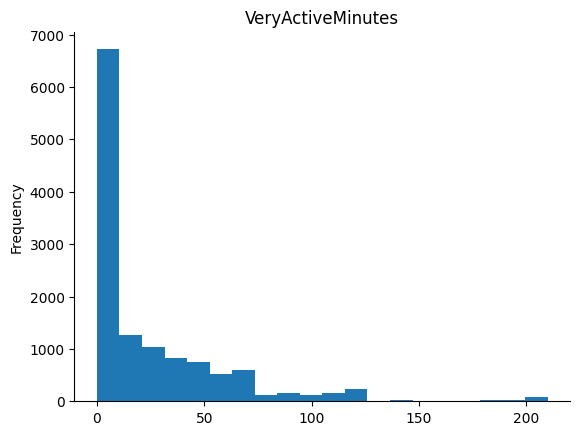

In [ ]:
#VeryActiveMinutes

from matplotlib import pyplot as plt
Merge_1['VeryActiveMinutes'].plot(kind='hist', bins=20, title='VeryActiveMinutes')
plt.gca().spines[['top', 'right',]].set_visible(False)

0 to 10 minutes of very active minutes within the time frame could reflect general activity patterns of the population, indicating that most people engage in very limited high-intensity physical activities.

Very Active Minutes and Weight

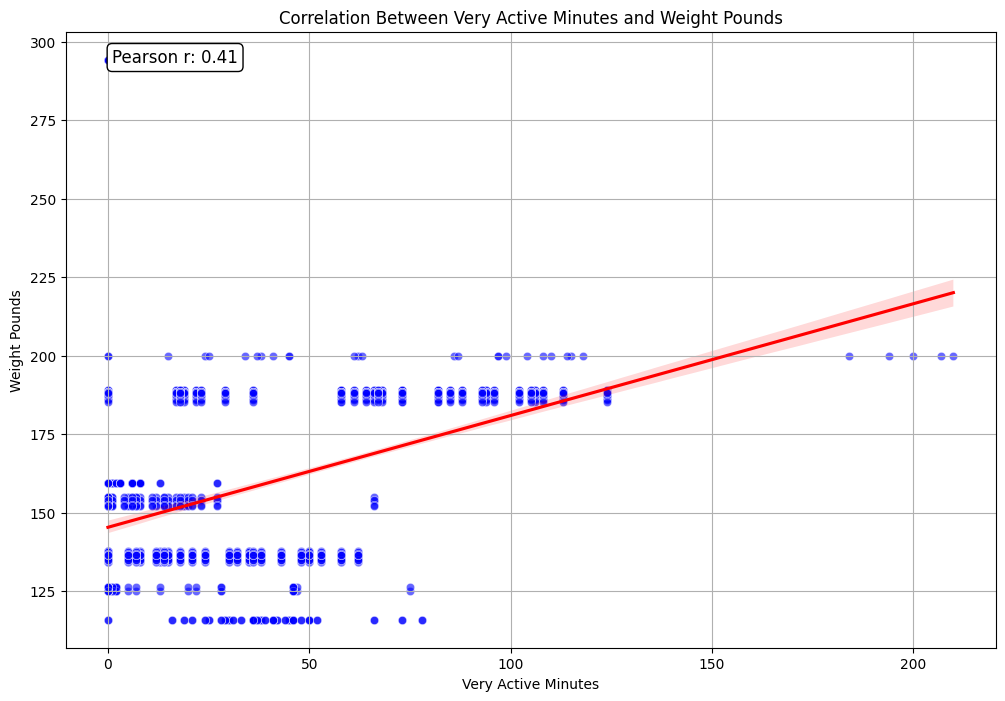

In [ ]:
# Assuming Merge_2 is your DataFrame
# Calculate the Pearson correlation coefficient
correlation = Merge_2['VeryActiveMinutes'].corr(Merge_2['WeightPounds'])

# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='VeryActiveMinutes', y='WeightPounds', data=Merge_2, color='blue', alpha=0.6)

# Add a regression line to the scatter plot to show the trend
sns.regplot(x='VeryActiveMinutes', y='WeightPounds', data=Merge_2, scatter=False, color='red')

# Annotate the plot with the Pearson correlation coefficient
plt.annotate(f'Pearson r: {correlation:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle="round", fc="white"))

# Enhancing the plot with title and labels
plt.title('Correlation Between Very Active Minutes and Weight Pounds')
plt.xlabel('Very Active Minutes')
plt.ylabel('Weight Pounds')
plt.grid(True)  # Adding grid for better readability
plt.show()

Calories Burned and Weight

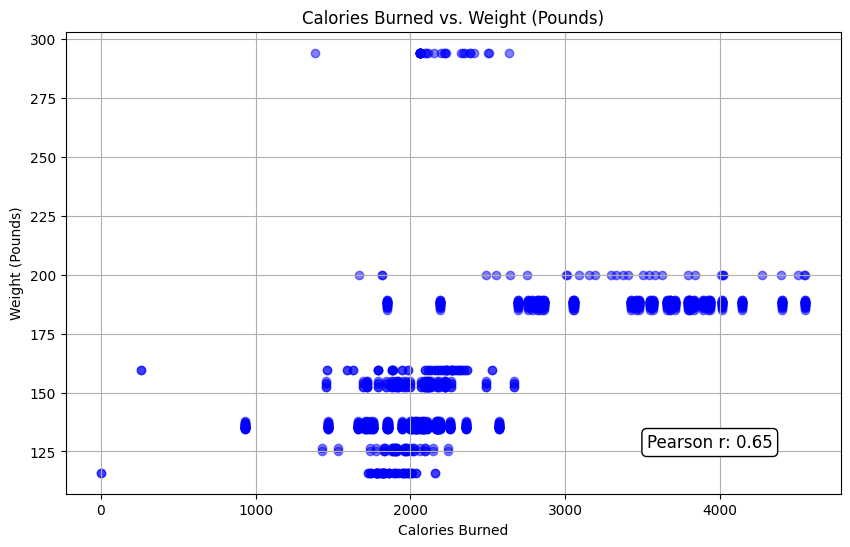

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot for Calories vs. WeightPounds using Merge_2
plt.figure(figsize=(10, 6))
plt.scatter(Merge_2['Calories'], Merge_2['WeightPounds'], color='blue', alpha=0.5)
m, b = np.polyfit(Merge_2['Calories'], Merge_2['WeightPounds'], 1)
plt.plot(Merge_2['Calories'], m*Merge_2['Calories'] + b, color='red')
correlation = Merge_2['Calories'].corr(Merge_2['WeightPounds'])
plt.title('Calories Burned vs. Weight (Pounds)')
plt.xlabel('Calories Burned')
plt.ylabel('Weight (Pounds)')
plt.grid(True)
plt.annotate(f'Pearson r: {correlation:.2f}', xy=(0.75, 0.1), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle="round", fc="white"))
plt.show()

Total Steps and Calories Burned

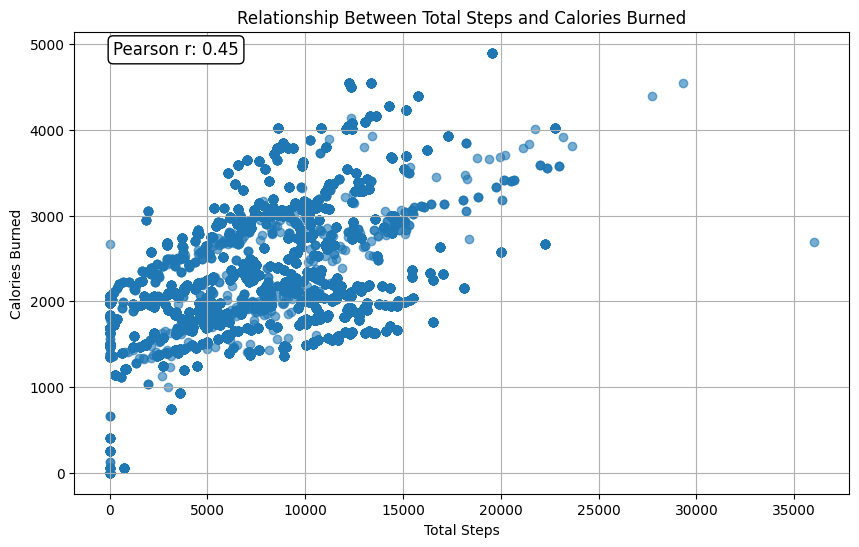

In [ ]:
# Generate the scatter plot using matplotlib for more flexibility
plt.figure(figsize=(10, 6))
plt.scatter(Merge_1['TotalSteps'], Merge_1['Calories'], alpha=0.6)  # Transparency makes overlapping points more visible

# Calculate the Pearson correlation coefficient
correlation = Merge_1['TotalSteps'].corr(Merge_1['Calories'])

# Annotate the plot with the Pearson correlation coefficient
plt.annotate(f'Pearson r: {correlation:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',
             fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

# Enhancing the plot
plt.title('Relationship Between Total Steps and Calories Burned')
plt.xlabel('Total Steps')
plt.ylabel('Calories Burned')
plt.grid(True)
plt.show()

The graphic show a low correlation between Calories and Total Steps per day, the sample suggest that the population ins't active as it should be. As much as a person is active more calories the person burn.

Total Minutes Asleep and Total Time in Bed

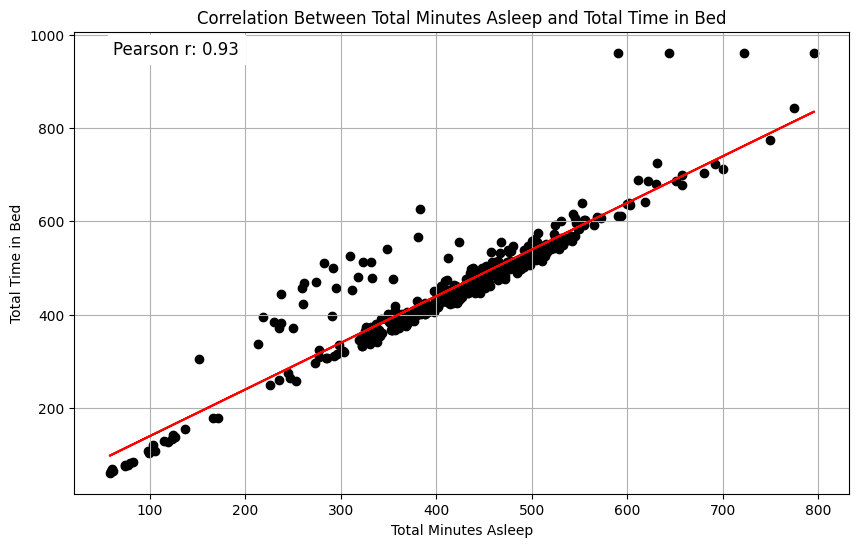

In [ ]:
# Generate the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(Sleep['TotalMinutesAsleep'], Sleep['TotalTimeInBed'], color='black')

# Calculate and plot the line of best fit
m, b = np.polyfit(Sleep['TotalMinutesAsleep'], Sleep['TotalTimeInBed'], 1)
plt.plot(Sleep['TotalMinutesAsleep'], m*Sleep['TotalMinutesAsleep'] + b, color='red')  # Red for visibility

# Calculate the Pearson correlation coefficient
correlation = Sleep['TotalMinutesAsleep'].corr(Sleep['TotalTimeInBed'])

# Annotate the correlation coefficient on the plot
plt.annotate(f'Pearson r: {correlation:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, backgroundcolor='white')

plt.title('Correlation Between Total Minutes Asleep and Total Time in Bed')
plt.xlabel('Total Minutes Asleep')
plt.ylabel('Total Time in Bed')
plt.grid(True)
plt.show()

This range likely represents the core sleeping hours for the population or group being studied. The average adult sleep duration is recommended to be between 7 to 9 hours (420 to 540 minutes), which fits within your observed range.

Sleep efficiency can be assessed by comparing total minutes asleep to total time in bed. The closer these numbers are to each other, the higher the sleep efficiency, meaning less time spent awake in bed.

Average Intensity by Times of Day


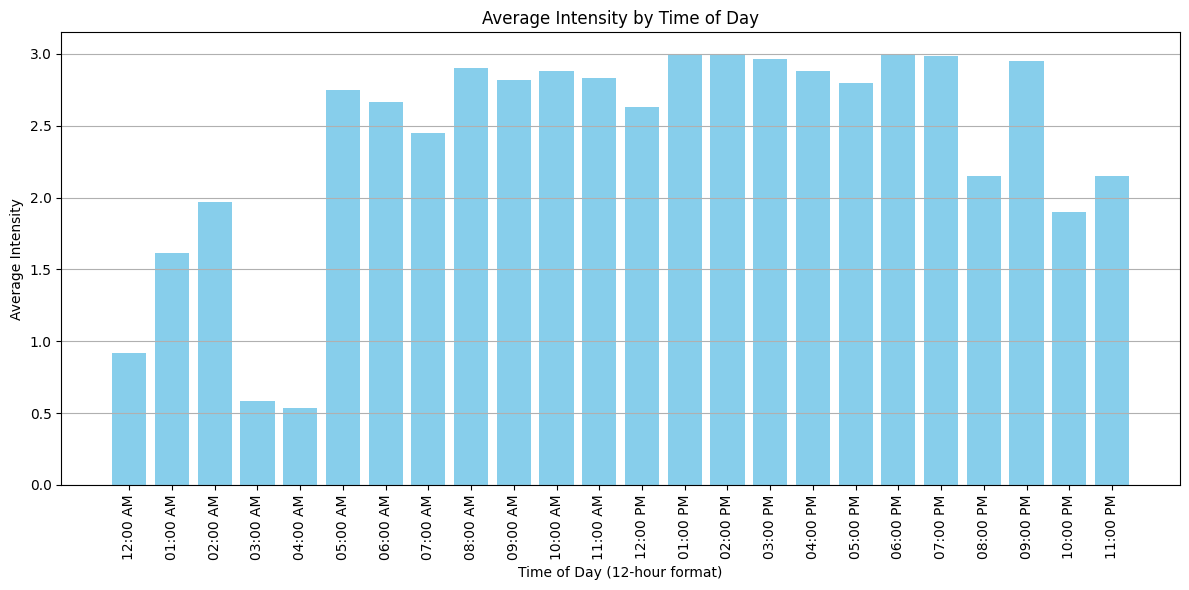

In [ ]:
# Plotting using a bar plot
plt.figure(figsize=(12, 6))  # Increased figure size for better visibility
plt.bar(hourlyIntensity['FormattedHour'], hourlyIntensity['AverageIntensity'], color='skyblue')
plt.title('Average Intensity by Time of Day')
plt.xlabel('Time of Day (12-hour format)')
plt.ylabel('Average Intensity')
plt.xticks(rotation=90)  # Rotate labels to prevent overlap
plt.grid(True, axis='y')  # Grid lines only on the y-axis
plt.tight_layout()
plt.show()

The graphic show a that the people in this sample are more active between 6pm and 7pm, probably because they left the work on evening and go to gym.

#Summarizing recommendations for the business



1.   The app could summarize how healthier the person is based on her habits, and highlight which days and months she has gotten the healthiest day.
2.   Bellabeat could calculate how many calories are being consumed taking a picture of each meal, helping the users control how many calories they are consuming.
3. The users are more active between 8am-10am and 4pm-7pm. The app could send notifications with a badage to show their progress according to their healthy lifestyle during the timeline.
4. The App could help the users to learn how to do breathing exercices during stressful times, if their lifestyle is desbalance.